# PRML Assignment 3

In [2]:
# import the libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

C:\Users\Deena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading data
data = pd.read_csv(r"C:\Users\Deena\Downloads\Bengaluru_House_Data.csv")

In [4]:
# reading data
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Exercise 1: Draw a scatter plot for the data mentioned for given attributes.
### Exercise 2: Perform Data pre-processing.

In [7]:
# using try-except for cleaning the total_sqft column values
avg = []
for s in data['total_sqft']:  
    try:
        avg.append(float(s))      # if the values only have numbers
    except:
        try:
            range_list = s.split('-')
            avg.append((range_list[0] + range_list[1]) / 2)      # if the values are in a range
        except:
            avg.append(0)  

In [8]:
data['avg_area'] = avg

In [9]:
data.drop(['total_sqft'], axis=1, inplace=True)

In [10]:
data.head()

,area_type,availability,location,size,society,bath,balcony,price,avg_area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,2.0,1.0,51.00,1200.0


In [11]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [12]:
data['size'] = data['size'].replace('4 Bedroom', '4 BHK')
data['size'] = data['size'].replace('3 Bedroom', '3 BHK')
data['size'] = data['size'].replace('2 Bedroom', '2 BHK')
data['size'] = data['size'].replace('4 Bedroom', '4 BHK')
data['size'] = data['size'].replace('1 Bedroom', '1 BHK')
data['size'] = data['size'].replace('5 Bedroom', '5 BHK')
data['size'] = data['size'].replace('6 Bedroom', '6 BHK')
data['size'] = data['size'].replace('7 Bedroom', '7 BHK')
data['size'] = data['size'].replace('8 Bedroom', '8 BHK')
data['size'] = data['size'].replace('9 Bedroom', '9 BHK')
data['size'] = data['size'].replace('10 Bedroom', '1O BHK')
data['size'] = data['size'].replace('11 Bedroom', '11 BHK')
data['size'] = data['size'].replace('12 Bedroom', '12 BHK')

In [13]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [14]:
le = LabelEncoder()
cols = ['area_type', 'availability', 'location', 'size', 'society']
# Encode labels of multiple columns at once
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()

,area_type,availability,location,size,society,bath,balcony,price,avg_area
0,3,40,419,11,464,2.0,1.0,39.07,1056.0
1,2,80,317,14,2439,5.0,3.0,120.00,2600.0
2,0,80,1179,13,2688,2.0,3.0,62.00,1440.0
3,3,80,757,13,2186,3.0,1.0,95.00,1521.0
4,3,80,716,11,2688,2.0,1.0,51.00,1200.0


In [15]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
bath             73
balcony         609
price             0
avg_area          0
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society', 'bath',
       'balcony', 'price', 'avg_area'],
      dtype='object')

<AxesSubplot:>

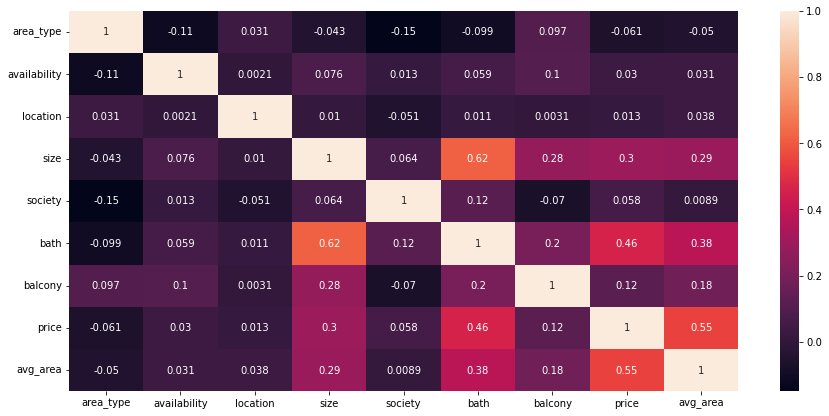

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [19]:
data.corr()['price'].sort_values()

area_type      -0.061415
location        0.012764
availability    0.030050
society         0.057865
balcony         0.120355
size            0.295952
bath            0.459730
avg_area        0.547874
price           1.000000
Name: price, dtype: float64

In [20]:
df=data.copy()
df.head()

,area_type,availability,location,size,society,bath,balcony,price,avg_area
0,3,40,419,11,464,2.0,1.0,39.07,1056.0
1,2,80,317,14,2439,5.0,3.0,120.00,2600.0
2,0,80,1179,13,2688,2.0,3.0,62.00,1440.0
3,3,80,757,13,2186,3.0,1.0,95.00,1521.0
4,3,80,716,11,2688,2.0,1.0,51.00,1200.0


In [21]:
N = float(len(df))

N

12711.0

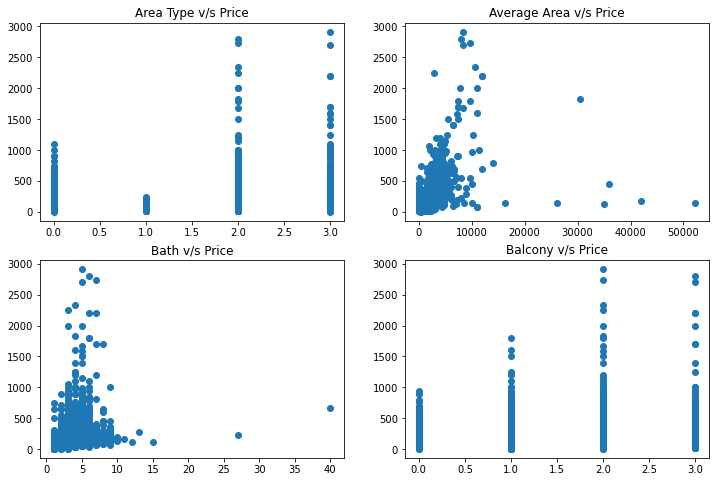

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(data['area_type'], data['price'])
plt.title("Area Type v/s Price")

plt.subplot(2,2,2)
plt.scatter(data['avg_area'], data['price'])
plt.title("Average Area v/s Price")

plt.subplot(2,2,3)
plt.scatter(data['bath'], data['price'])
plt.title("Bath v/s Price")

plt.subplot(2,2,4)
plt.scatter(data['balcony'], data['price'])
plt.title("Balcony v/s Price")

plt.show()

### Exercise 3: Performs gradient descent to learn theta. (using the library and without using the library). Compare the values of ‘theta’ in both cases.
### Exercise 4: Splitting data into the training and testing, 60:40, 70:30, ND 80:20.
### Exercise 5: Train multilinear regression model and test USING Gradient Descent and using the library. Compare your results with Simple Linear Regression.

In [30]:
ss = StandardScaler()

In [31]:
x = df[['area_type', 'availability', 'location', 'size', 'society', 'bath',
       'balcony', 'price', 'avg_area']]
X = ss.fit_transform(x)

In [34]:
#y = preprocessing.scale(df['cnt'])
y = df['price'].values.reshape(-1, 1)
y_scaled = ss.fit_transform(y)
ori_shape = ss.inverse_transform(y_scaled.reshape(-1, 1))
df['price'] = ori_shape
Y = df.iloc[:,-1].values

In [35]:
df.dtypes

area_type         int32
availability      int32
location          int32
size              int32
society           int32
bath            float64
balcony         float64
price           float64
avg_area        float64
dtype: object

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4,random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7626, 9)
Shape of X_test: (5085, 9)


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8897, 9)
Shape of X_test: (3814, 9)


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)
print("Shape of X_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (10168,)
Shape of X_test: (2543, 9)


In [41]:
# Lists to store RMSE and RMSLE values during training
rmse_values = []

# gradient descent using matrix dot product
A = 0.000001
epochs = 100

n = float(len(Y_train))
print("N:",n)

# t - theta - making a matrix of the dimension [no of columns of X, 1]
t1 = np.zeros(X_train.shape[1])
print("Theta: ",t1.shape)

# Separate intercept term (theta0) from other coefficients

print("t1: ",t1.shape)


for i in range(epochs):
    Y_pred = np.dot(X_train, t1) #+ t0         # taking a dot product of the matrices X and t1 and add t0
    #print("Y_pred: ",Y_pred.shape)
    
    err = Y_pred - Y_train
    D_t1 = (-2/n) * np.dot(err, X_train)      # partial derivative wrt t1
    #print("D_t1: ",D_t1.shape)
    #D_t0 = (-1/n) * np.sum(err)            # partial derivative wrt t
    
    t1 = t1 - A * D_t1                           # updatation of t
    #t0 = t0 - A * D_t0
    
    # Calculate RMSE and RMSLE and store in lists
    rmse_values.append(np.sqrt(mean_squared_error(Y_test, np.dot(X_test, t1) )))  #+ t0
    #rmsle_values.append(np.sqrt(mean_squared_log_error(Y_test, np.dot(X_test, t1))))  # +t0

    
# Print the final coefficients
print("Coefficients", t1)
#print("Intercept (theta0):", t0)

N: 10168.0
Theta:  (9,)
t1:  (9,)
Coefficients [ 0.01048995 -0.00900813 -0.008362   -0.06892097  0.00284307 -0.08988877
 -0.0422025  -0.12662811 -0.21595843]


In [42]:
# r2 score for gradient descent
y_pred1 = np.dot(X_test, t1)
print("R2 Score when gradient descent is used: ",r2_score(Y_test, y_pred1))

# r2 score using library
model = LinearRegression()
model.fit(X_train, Y_train)
print("R2 score using the library: ",model.score(X_test, Y_test))

# Difference 
print("Differnce: ",model.score(X_test, Y_test)-r2_score(Y_test, y_pred1))

R2 Score when gradient descent is used:  -1.2670429660215747
R2 score using the library:  1.0
Differnce:  2.2670429660215747


In [43]:
y_pred = np.dot(X_test, t1)
y_pred

array([-0.11604822,  0.25778078,  0.26487181, ...,  0.39983997,
        0.14710519, -1.17509271])

In [44]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Y_test, y_pred)

RMSE_multi = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE_multi)
R2_before = r2_score(Y_test, y_pred1)

Root Mean Square Error:

2000.9334984390923


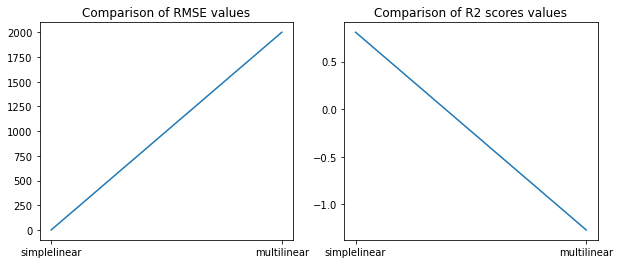

In [45]:
RMSE_single = 0.43818325380484446    # from previous lab
r2_single =  0.8079810202456749      # from previous lab
name_list = ['simplelinear', 'multilinear']
value1_list = [RMSE_single, RMSE_multi]
value2_list = [r2_single, R2_before]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(name_list, value1_list)
plt.title("Comparison of RMSE values")
plt.subplot(1,2,2)
plt.plot(name_list, value2_list)
plt.title("Comparison of R2 scores values")
plt.show()

In [46]:
x = df[['balcony', 'size', 'bath', 'society', 'area_type']]

In [47]:
y = df['price']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (10168, 9)
Shape of X_test: (2543, 9)


In [49]:
rmse_values = []

# gradient descent using matrix dot product
A = 0.0000001
epochs = 100

n = float(len(Y_train))
print("N:",n)
t1 = np.zeros(X_train.shape[1])
print("Theta: ",t1.shape)
print("t1: ",t1.shape)

N: 10168.0
Theta:  (9,)
t1:  (9,)


In [57]:
for i in range(epochs):
    Y_pred = np.dot(X_train, t1) #+ t0      
    
    err = Y_pred - Y_train
    D_t1 = (2/n) * np.dot(np.transpose(X_train), np.transpose(err))      # partial derivative wrt t1
    
    t1 = t1 - A * D_t1                           # updatation of t
    
    # Calculate RMSE and RMSLE and store in lists
    rmse_values.append(np.sqrt(mean_squared_error(Y_test, np.dot(X_test, t1) )))  #+ t0

In [58]:
# Print the final coefficients
print("Coefficients (excluding intercept):", t1)
#print("Intercept (theta0):", t0)
print(" ")
# r2 score for gradient descent
y_pred1 = np.dot(X_test, t1)
print("R2 Score when gradient descent is used: ",r2_score(Y_test, y_pred1))
print(" ")
# r2 score using library
model = LinearRegression()
model.fit(X_train, Y_train)
print("R2 score using the library: ",model.score(X_test, Y_test))
print("")
# Difference 
print("Differnce: ",model.score(X_test, Y_test)-r2_score(Y_test, y_pred1))

Coefficients (excluding intercept): [-0.00209711  0.0018008   0.00167189  0.01377852 -0.00056908  0.01797099
  0.00843733  0.02531825  0.04318378]
 
R2 Score when gradient descent is used:  -1.2663869998991952
 
R2 score using the library:  1.0

Differnce:  2.2663869998991952


In [59]:
RMSE_multi = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE_multi)
R2_after = r2_score(Y_test, y_pred1)

Root Mean Square Error:

2000.9334984390923


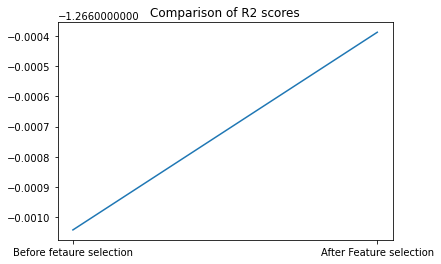

In [60]:
name_list2 = ['Before fetaure selection', 'After Feature selection']
value_list = [R2_before, R2_after]
plt.plot(name_list2, value_list)
plt.title("Comparison of R2 scores")
plt.show()

### Exercise 6: Did you expect ridge regression to outperform the lasso, or vice versa? Which predictors turned out to be important in the final model(s)?  
#### Predictors important in the final model: balcony, size, bath, society, area_type

In [61]:
from sklearn.linear_model import Ridge, Lasso

RR= Ridge(alpha=0.1) 
RR= RR.fit(X_train, Y_train)
RR_pred= RR.predict(X_test)

LR= Lasso(alpha=1.0) # Regularization parameter
LR= LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

In [62]:
print("Model Score for Ridge Regression: ", RR.score(X_test, Y_test))
print("Model Score for Lasso Regression: ", LR.score(X_test, Y_test))

Model Score for Ridge Regression:  0.9999999997932006
Model Score for Lasso Regression:  0.9999991456630652
